In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sensex-730days-hourly-data/Sensex.csv
/kaggle/input/sensex-last-30y/Sensex_30Y.csv


In [2]:
df = pd.read_csv('../input/sensex-last-30y/Sensex_30Y.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0
1,1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0
2,1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0
3,1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0
4,1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
df['Date']= pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
df=df[3078:]

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3078,2009-12-16,16866.949219,16996.119141,16777.939453,16912.769531,16912.769531,19400
3079,2009-12-17,16912.250000,16979.519531,16826.000000,16894.250000,16894.250000,22000
3080,2009-12-18,16855.910156,16899.189453,16693.060547,16719.830078,16719.830078,18600
3081,2009-12-21,16724.839844,16750.990234,16577.779297,16601.199219,16601.199219,17200
3082,2009-12-22,16633.810547,16738.119141,16633.810547,16692.000000,16692.000000,14400


In [10]:
df2= df.reset_index()['Adj Close']

In [11]:
df1 = df.reset_index()['Adj Close']

In [12]:
df1.shape

(3082,)

In [13]:
df1

0       16912.769531
1       16894.250000
2       16719.830078
3       16601.199219
4       16692.000000
            ...     
3077    53161.281250
3078    53177.449219
3079    53026.968750
3080    53018.941406
3081    52524.730469
Name: Adj Close, Length: 3082, dtype: float64

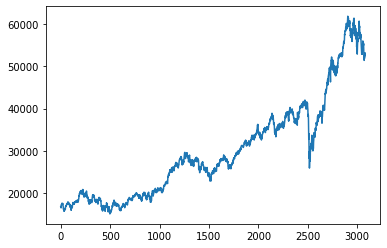

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
import numpy as np

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1

array([[0.03729707],
       [0.03689957],
       [0.03315589],
       ...,
       [0.81243774],
       [0.81226545],
       [0.8016579 ]])

> Preprocess the data -Train and Test

**Train and Test Split**

In [18]:
training_size= int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

> Convert the array to dataset matrix

In [19]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [20]:
time_step=100
X_train,y_train= create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train)

[[0.03729707 0.03689957 0.03315589 ... 0.04487586 0.03905344 0.03563989]
 [0.03689957 0.03315589 0.03060965 ... 0.03905344 0.03563989 0.03650271]
 [0.03315589 0.03060965 0.03255856 ... 0.03563989 0.03650271 0.02647342]
 ...
 [0.36452875 0.36512436 0.36631601 ... 0.44622692 0.44497431 0.42694682]
 [0.36512436 0.36631601 0.36697451 ... 0.44497431 0.42694682 0.42030191]
 [0.36631601 0.36697451 0.37021874 ... 0.42694682 0.42030191 0.40825613]]


In [22]:
print(X_train.shape), print(y_train.shape)

(1902, 100)
(1902,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(978, 100)
(978,)


(None, None)

In [24]:
X_test

array([[0.40417419, 0.41049967, 0.40739776, ..., 0.43364028, 0.4393667 ,
        0.43784605],
       [0.41049967, 0.40739776, 0.41043527, ..., 0.4393667 , 0.43784605,
        0.43963415],
       [0.40739776, 0.41043527, 0.40428151, ..., 0.43784605, 0.43963415,
        0.44557655],
       ...,
       [0.93769075, 0.95262422, 0.93609063, ..., 0.79609858, 0.80602038,
        0.81532057],
       [0.95262422, 0.93609063, 0.93301706, ..., 0.80602038, 0.81532057,
        0.8156676 ],
       [0.93609063, 0.93301706, 0.9110463 , ..., 0.81532057, 0.8156676 ,
        0.81243774]])

> Reshape input to be samples time steps features

In [25]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2022-07-01 09:14:42.597591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 09:14:42.718499: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 09:14:42.719267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 09:14:42.721082: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=128,verbose=1)

Epoch 1/100


2022-07-01 09:14:45.917698: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-01 09:14:50.008653: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


15/15 [==============================] - 7s 96ms/step - loss: 0.0113 - val_loss: 0.0765
Epoch 2/100
15/15 [==============================] - 0s 21ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 3/100
15/15 [==============================] - 0s 20ms/step - loss: 3.9506e-04 - val_loss: 0.0015
Epoch 4/100
15/15 [==============================] - 0s 20ms/step - loss: 2.3348e-04 - val_loss: 0.0015
Epoch 5/100
15/15 [==============================] - 0s 20ms/step - loss: 2.1231e-04 - val_loss: 0.0015
Epoch 6/100
15/15 [==============================] - 0s 21ms/step - loss: 2.0621e-04 - val_loss: 0.0017
Epoch 7/100
15/15 [==============================] - 0s 20ms/step - loss: 2.0682e-04 - val_loss: 0.0015
Epoch 8/100
15/15 [==============================] - 0s 21ms/step - loss: 2.0399e-04 - val_loss: 0.0015
Epoch 9/100
15/15 [==============================] - 0s 20ms/step - loss: 2.0097e-04 - val_loss: 0.0014
Epoch 10/100
15/15 [==============================] - 0s 21ms/step - loss: 1.9734e-0

In [30]:
train_predict= model.predict(X_train)
test_predict=model.predict(X_test)

In [31]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

23945.679055718414

In [33]:
math.sqrt(mean_squared_error(ytest,test_predict))

45118.495026552264

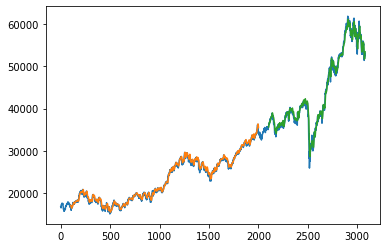

In [34]:
# shift train predictions for plotting 
look_back=100 
trainPredictPlot = numpy.empty_like(df1) 
trainPredictPlot[:, :] = np. nan 
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict 
# shift test predictions for plotting 
testPredictPlot = numpy.empty_like(df1) 
testPredictPlot[:, :] = numpy.nan 
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df1)-1, :] = test_predict 
# plot baseline and predictions 
plt.plot(scaler.inverse_transform(df1)) 
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot) 
plt.show()

## Forecasting

In [35]:
len(test_data)

1079

In [36]:
x_input = test_data[979:].reshape(1,-1)
x_input.shape



(1, 100)

In [37]:
temp_input=list(x_input)
temp_input= temp_input[0].tolist()

In [38]:
temp_input

[0.9110462955149339,
 0.9150682888284358,
 0.9291782573243168,
 0.9390528541534642,
 0.9224591448575334,
 0.8849604774242139,
 0.9222258120649822,
 0.9191056252612471,
 0.9168590739941214,
 0.9155917994129454,
 0.9123855905304616,
 0.9041669606383174,
 0.9026941050268378,
 0.8446962756170879,
 0.8732130139331873,
 0.8815572394139919,
 0.8648503431723391,
 0.8569899709239506,
 0.8404872303955075,
 0.8084837472558979,
 0.820961392310104,
 0.8472164877663149,
 0.8647535892942924,
 0.8665975304033762,
 0.8866814220522798,
 0.8714601254337733,
 0.8937779081803183,
 0.9162563325476063,
 0.9039911435826293,
 0.9189472473794182,
 0.9124120008177967,
 0.9104987222241856,
 0.9054873911628916,
 0.9104516867600745,
 0.9179673837981943,
 0.9338577410291904,
 0.9313791984444257,
 0.9465792829908821,
 0.9752341932229442,
 0.9658924134605102,
 0.9537420882848955,
 0.9413906257146236,
 0.9502385750249818,
 0.9398800411212367,
 0.9315478889146425,
 0.9264515418807839,
 0.9012920960591617,
 0.88619052607

In [39]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8223157]
101
1 day input [0.91506829 0.92917826 0.93905285 0.92245914 0.88496048 0.92222581
 0.91910563 0.91685907 0.9155918  0.91238559 0.90416696 0.90269411
 0.84469628 0.87321301 0.88155724 0.86485034 0.85698997 0.84048723
 0.80848375 0.82096139 0.84721649 0.86475359 0.86659753 0.88668142
 0.87146013 0.89377791 0.91625633 0.90399114 0.91894725 0.912412
 0.91049872 0.90548739 0.91045169 0.91796738 0.93385774 0.9313792
 0.94657928 0.97523419 0.96589241 0.95374209 0.94139063 0.95023858
 0.93988004 0.93154789 0.92645154 0.9012921  0.88619053 0.89851818
 0.91728122 0.90194481 0.88869623 0.90536741 0.89383677 0.90889709
 0.89901981 0.89719791 0.86914591 0.86985849 0.85125701 0.84342481
 0.84115352 0.83521968 0.81036307 0.80742926 0.81129741 0.84015798
 0.83779833 0.80739942 0.84032801 0.83951709 0.83445168 0.82794075
 0.83874273 0.85231049 0.87465577 0.8669433  0.86296742 0.87234567
 0.87129655 0.8692809  0.85708999 0.85247851 0.86166048 0.83983544
 0.80856851 0.80528181 0.80201549 0.7

In [40]:
len(df1)

3082

In [41]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [42]:
df3 = df1.tolist()
df3.extend(lst_output)


In [43]:
len(df1)


3082

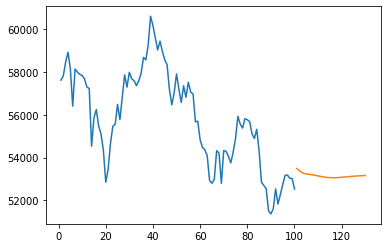

In [44]:
plt.plot(day_new, scaler.inverse_transform(df1[2982:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

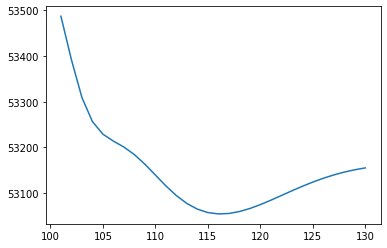

In [45]:
plt.plot(day_pred, scaler.inverse_transform(lst_output))